In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Fetch the webpage
url = "https://archive.ics.uci.edu/dataset/45/heart+disease"
response = requests.get(url)

In [3]:
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, "html.parser")

In [5]:
# Find the table containing the dataset information
table = soup.find("table")

In [6]:
# Extract table headers
headers = [th.text.strip() for th in table.find_all("th")]

In [8]:
data = []
for tr in table.find_all("tr"):
        row = [td.text.strip() for td in tr.find_all("td")]
        if row:
            data.append(row)

In [10]:
 # Create a DataFrame
df = pd.DataFrame(data, columns=headers)

In [11]:
# Print the DataFrame
print(df)

  Variable Name     Role         Type Demographic  \
0           age  Feature      Integer         Age   
1           sex  Feature  Categorical         Sex   
2            cp  Feature  Categorical               
3      trestbps  Feature      Integer               
4          chol  Feature      Integer               
5           fbs  Feature  Categorical               
6       restecg  Feature  Categorical               
7       thalach  Feature      Integer               
8         exang  Feature  Categorical               
9       oldpeak  Feature      Integer               

                                         Description  Units Missing Values  
0                                                     years             no  
1                                                                       no  
2                                                                       no  
3  resting blood pressure (on admission to the ho...  mm Hg             no  
4                              

In [17]:
import matplotlib.pyplot as plt

In [18]:
# Filter out rows where 'Missing Values' is not 'no'
filtered_df = df[df['Missing Values'] != 'no']

In [19]:
# Convert 'Missing Values' to integer
filtered_df['Missing Values'] = filtered_df['Missing Values'].astype(int)

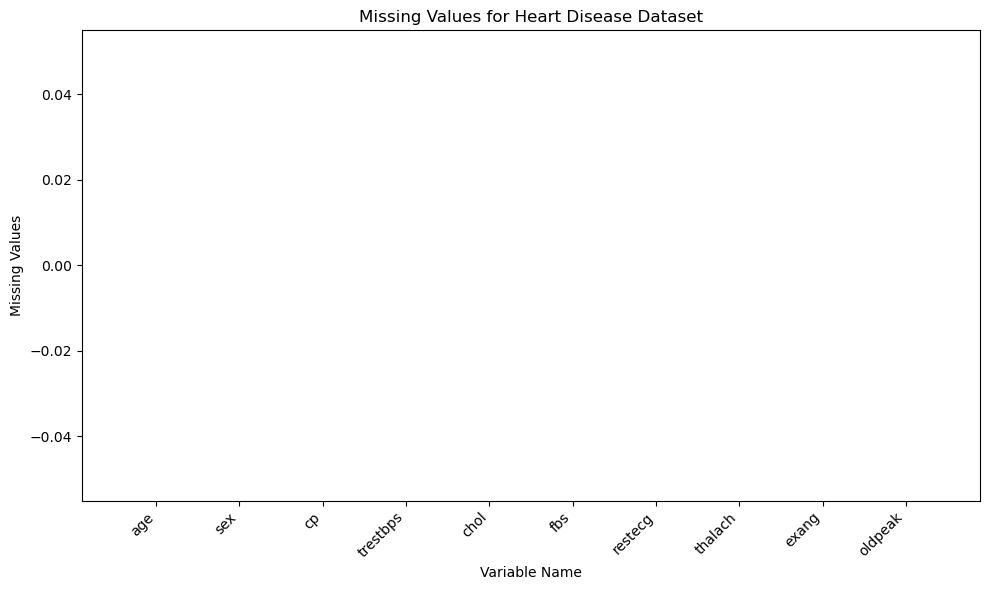

In [20]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.bar(filtered_df['Variable Name'], filtered_df['Missing Values'])
plt.xlabel('Variable Name')
plt.ylabel('Missing Values')
plt.title('Missing Values for Heart Disease Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()